   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


Enter API Key: 0F4ISiYl4TlwoRRJ8aMxPcOwT
Enter API Secret Key: o30Q8irKsHZiXA3x3vsakSyMEMUonvb6qTUSKHVlLwOnAdJwsT
Enter Access Token: 1968339017876881408-QFUNp0j8MaKgoQbmWTrPQq9PymhGZs 
Enter Access Token Secret: qDAjER1pHA0EsPP8shZUYQCrhqcCqQx3RgLEZASWr2bdQ
Connected to Twitter API! ✅


BadRequest: 400 Bad Request
215 - Bad Authentication data.

In [ ]:
# Step 0: Install required libraries (run once)
!pip install tweepy textblob pandas matplotlib

# Step 1: Import libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Enter your Twitter API keys and tokens
api_key = input("Enter API Key: ")
api_secret = input("Enter API Secret Key: ")
access_token = input("Enter Access Token: ")
access_token_secret = input("Enter Access Token Secret: ")

# Step 3: Authenticate with Twitter
auth = tweepy.OAuth1UserHandler(
    consumer_key=api_key,
    consumer_secret=api_secret,
    access_token=access_token,
    access_token_secret=access_token_secret
)

api = tweepy.API(auth)

# Step 4: Verify authentication
try:
    api.verify_credentials()
    print("Authentication OK ✅")
except Exception as e:
    print("Error during authentication ❌")
    print(e)
    raise SystemExit("Check your API keys and tokens!")

# Step 5: Fetch Tweets safely
try:
    tweets = api.search_tweets(q="Python", count=20, lang="en")  # Change query or count as needed
    print(f"Fetched {len(tweets)} tweets successfully ✅")
except Exception as e:
    print("Error fetching tweets ❌")
    print(e)
    raise SystemExit("Check your query or API permissions!")

# Step 6: Sentiment Analysis & store in DataFrame
data = []
for tweet in tweets:
    text = tweet.text
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    data.append([tweet.user.screen_name, text, polarity, sentiment])

df = pd.DataFrame(data, columns=["User", "Tweet", "Polarity", "Sentiment"])
print(df.head())

# Step 7: Visualization of sentiment
df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','blue'])
plt.title("Sentiment Analysis of Tweets about Python")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


Enter API Key: KYpi7Bpzb6kWNQJn8yzfYlSKz
Enter API Secret Key: NRiCyOaktWEeCRYiLaVFv7EC5yM1PSYQSbtsWVQBjfWj27bXJJ
Enter Access Token: 1968339017876881408-MKXEkfAnKffYkrgeTcBBs7WplNYFkC
Enter Access Token Secret: zdwUsXEhWt0DmytxagLCdSITmewlBCsMbpp2suG9A7jYu


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Authentication OK ✅
Error fetching tweets ❌
403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product
Traceback (most recent call last):
  File "/tmp/ipython-input-2456772224.py", line 37, in <cell line: 0>
    tweets = api.search_tweets(q="Python", count=20, lang="en")  # Change query or count as needed
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/tweepy/api.py", line 32, in wrapper
    return method(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/tweepy/api.py", line 45, in wrapper
    return method(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/tweepy/api.py", line 1221, in search_tweets
    ret

TypeError: object of type 'NoneType' has no len()

Enter your Bearer Token: AAAAAAAAAAAAAAAAAAAAAFv94AEAAAAAbnT3a1du7F6BmsJPRI3dHPfMZhQ%3Da5i3MCX7ZVkvjUTnSIrM9q5eLLYu3FP75A6b299zIkYRquxPmx
Sample Tweets with Sentiment:

                                               Tweet  Polarity Sentiment
0  I’m the Ignition yearly conference and the cro...     0.000   Neutral
1  @KeyMetaX @AMAZlNGNATURE This looks like a ret...    -0.075  Negative
2  @samirande_ I am a firm believer that python i...    -0.100  Negative
3  S1 EP2 T3 - Machine Learning in Python Class v...     0.000   Neutral
4  Study Log 198: More practice in solving proble...     0.500  Positive


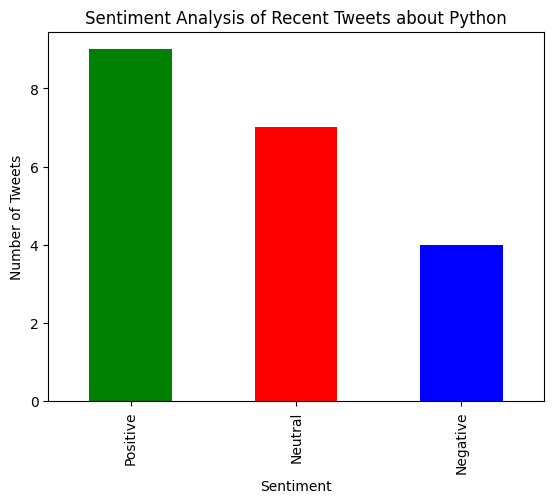

In [ ]:
# Step 0: Install required libraries (run once)
!pip install tweepy textblob pandas matplotlib

# Step 1: Import libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Enter your Bearer Token
bearer_token = input("Enter your Bearer Token: ")

# Step 3: Create Tweepy Client (V2 API)
client = tweepy.Client(bearer_token=bearer_token)

# Step 4: Fetch recent tweets (max 20 for free-tier)
query = "Python -is:retweet lang:en"  # filter out retweets, English only
response = client.search_recent_tweets(query=query, max_results=20)

tweets = response.data
if not tweets:
    raise SystemExit("No tweets fetched. Check your query or API access level.")

# Step 5: Sentiment Analysis & store in DataFrame
data = []
for tweet in tweets:
    text = tweet.text
    polarity = TextBlob(text).sentiment.polarity  # -1 to +1
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    data.append([text, polarity, sentiment])

df = pd.DataFrame(data, columns=["Tweet", "Polarity", "Sentiment"])
print("Sample Tweets with Sentiment:\n")
print(df.head())

# Step 6: Visualization
df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','blue'])
plt.title("Sentiment Analysis of Recent Tweets about Python")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


Sample Tweets with VADER Sentiment:

                                               Tweet  Compound Sentiment
0  I’m the Ignition yearly conference and the cro...    0.7184  Positive
1  @KeyMetaX @AMAZlNGNATURE This looks like a ret...   -0.2263  Negative
2  @samirande_ I am a firm believer that python i...    0.0000   Neutral
3  S1 EP2 T3 - Machine Learning in Python Class v...    0.0000   Neutral
4  Study Log 198: More practice in solving proble...   -0.0094   Neutral

Comparison between TextBlob & VADER:

                                               Tweet Sentiment VADER_Sentiment
0  I’m the Ignition yearly conference and the cro...   Neutral        Positive
1  @KeyMetaX @AMAZlNGNATURE This looks like a ret...  Negative        Negative
2  @samirande_ I am a firm believer that python i...  Negative         Neutral
3  S1 EP2 T3 - Machine Learning in Python Class v...   Neutral         Neutral
4  Study Log 198: More practice in solving proble...  Positive         Neutral

Total Negat

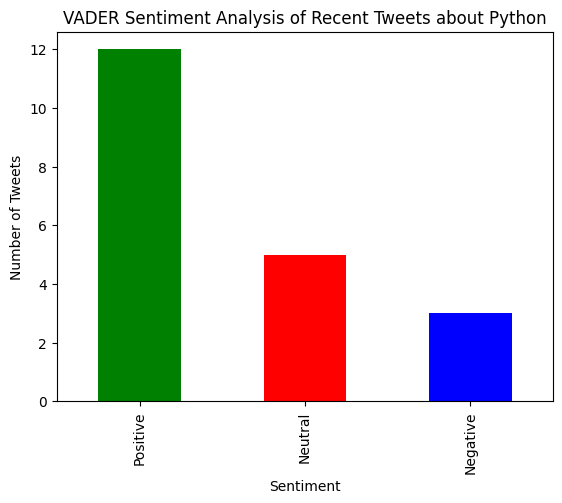

In [ ]:
# Step 7: VADER Sentiment Analysis + Negative Tweets Handling
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER Analyzer
analyzer = SentimentIntensityAnalyzer()
vader_data = []

for tweet in tweets:
    text = tweet.text
    vs = analyzer.polarity_scores(text)  # returns dict: neg, neu, pos, compound
    compound = vs['compound']

    # Classification based on compound score
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    vader_data.append([text, compound, sentiment])

vader_df = pd.DataFrame(vader_data, columns=["Tweet", "Compound", "Sentiment"])
print("Sample Tweets with VADER Sentiment:\n")
print(vader_df.head())

# Comparison between TextBlob & VADER
comparison_df = df[['Tweet', 'Sentiment']].copy()
comparison_df['VADER_Sentiment'] = vader_df['Sentiment']
print("\nComparison between TextBlob & VADER:\n")
print(comparison_df.head())

# Filter Negative Tweets
negative_tweets = vader_df[vader_df['Sentiment'] == "Negative"]
print(f"\nTotal Negative Tweets: {len(negative_tweets)}")
print(negative_tweets[['Tweet', 'Compound']])

# Save Negative Tweets to CSV
negative_tweets.to_csv("negative_tweets.csv", index=False)
print("\nNegative tweets saved to 'negative_tweets.csv'")

# Visualization (VADER Sentiment)
vader_df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','blue'])
plt.title("VADER Sentiment Analysis of Recent Tweets about Python")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()
